GTI770 - Systèmes Intelligents et Apprentissage Machine

Alessandro L. Koerich

Notebook Jupyter - 10_SVM_11Classes

July 2018

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
import numpy as np

In [38]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [39]:
# Load TRAIN, TEST, UNKNOWN CLASS data from files
# Numeric inputs and outputs
# load data from file

rnaNNSTrainData = np.loadtxt('CSV_Files/rnaNNSTrain.csv', delimiter=' ', dtype=np.str)
rnaNNSValidData = np.loadtxt('CSV_Files/rnaNNSValid.csv', delimiter=' ', dtype=np.str)

# Separate inputs (features) from outputs (labels)
# last 11 columns = class labels (one-hot-encoding)

Xtrain=rnaNNSTrainData[0:183,0:42].astype(np.float)
Ytrain=rnaNNSTrainData[0:183,42:53].astype(np.int)

Xvalid=rnaNNSValidData[0:163,0:42].astype(np.float)
Yvalid=rnaNNSValidData[0:163,42:53].astype(np.int)

In [41]:
# 42 columns = inputs
Xtrain

array([[0.44, 0.07, 0.78, ..., 0.55, 0.55, 0.55],
       [0.29, 0.09, 0.87, ..., 0.87, 0.87, 0.87],
       [0.34, 0.16, 0.62, ..., 0.65, 0.66, 0.66],
       ...,
       [0.38, 0.37, 0.56, ..., 0.47, 0.45, 0.45],
       [0.4 , 0.15, 0.72, ..., 0.41, 0.38, 0.38],
       [0.56, 0.49, 0.31, ..., 0.28, 0.3 , 0.3 ]])

In [42]:
# 11 columns = outputs
Ytrain

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [43]:
# For the SVM we need a single label instead of binary (OHE) outputs
from numpy import argmax
Ytrain2 = argmax(Ytrain, axis=1)
Yvalid2 = argmax(Yvalid, axis=1)

In [44]:
# normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
Xtrain = scaler.fit_transform(Xtrain)
Xvalid = scaler.fit_transform(Xvalid)

In [45]:
Ytrain2

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10,  9,  8,  7,  4,  5,  3,  2,  1])

In [46]:
num_classes = Ytrain.shape[1]
input_dim = Xtrain.shape[1]

In [47]:
input_dim

42

In [48]:
num_classes

11

In [49]:
def linearSVM_model():
    print("SVM with Linear Kernel\n")
    # create model
    model = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=1, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

    return model

In [50]:
# Build the model
# Choose one at each time
model = linearSVM_model()

SVM with Linear Kernel



In [52]:
# Fit the model (TRAIN)
model.fit(Xtrain, Ytrain2)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=1, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [53]:
# Use the model to predict the class of samples
# Notice that we are testing the train dataset
Ytrain_pred = model.predict(Xtrain)
Ytrain_pred

Yvalid_pred = model.predict(Xvalid)
Yvalid_pred

array([ 0,  0,  0,  0,  0, 10,  0,  0, 10, 10, 10, 10, 10, 10,  0, 10,  1,
        1,  1,  1,  1,  1,  1,  8,  1,  1,  1,  2,  1,  1,  8,  1,  9,  0,
        2,  9, 10,  8,  9, 10,  8, 10,  3,  9,  3,  9,  3,  9,  9,  3,  4,
        3,  9,  3,  3,  9,  9,  9,  9,  9,  9,  4,  6,  6,  4,  9,  4,  4,
        4,  1,  4,  4,  9,  4, 10, 10, 10, 10, 10, 10,  3,  4,  6,  9,  4,
        3,  4,  9,  4,  4,  4,  9,  4,  9,  7,  7, 10,  7,  9,  9,  1,  1,
        1,  1,  8,  8,  1,  8,  8,  8,  9,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  9,  1,  4,  1,  9,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  4,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10,  9, 10,  9, 10])

In [55]:
# You can also predict the probability of each class
# train dataset
Ytrain_pred_prob = model.predict_proba(Xtrain)
Ytrain_pred_prob

Yvalid_pred_prob = model.predict_proba(Xvalid)
Yvalid_pred_prob

array([[0.66, 0.01, 0.03, ..., 0.03, 0.01, 0.21],
       [0.78, 0.  , 0.01, ..., 0.  , 0.  , 0.19],
       [0.47, 0.01, 0.01, ..., 0.  , 0.01, 0.29],
       ...,
       [0.03, 0.02, 0.11, ..., 0.01, 0.11, 0.39],
       [0.02, 0.02, 0.08, ..., 0.02, 0.38, 0.13],
       [0.06, 0.03, 0.13, ..., 0.02, 0.13, 0.38]])

In [56]:
# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Final evaluation of the model (On the Training, Validation or Test dataset)
scores = accuracy_score(Ytrain2, Ytrain_pred )
print("Correct classification rate for the training dataset = "+str(scores*100)+"%")

scores2 = accuracy_score(Yvalid2, Yvalid_pred )
print("Correct classification rate for the validation dataset = "+str(scores2*100)+"%")

Correct classification rate for the training dataset = 65.57377049180327%
Correct classification rate for the validation dataset = 55.21472392638037%


In [57]:
from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4','5','6','7','8','9','10']
print( classification_report(Yvalid2, Yvalid_pred, target_names=target_names))
# This works, but we have labels with no predicted samples

              precision    recall  f1-score   support

           0       0.89      0.50      0.64        16
           1       0.62      0.81      0.70        16
           2       0.50      0.10      0.17        10
           3       0.78      0.39      0.52        18
           4       0.44      0.57      0.50        14
           5       0.00      0.00      0.00         6
           6       0.33      0.08      0.12        13
           7       1.00      0.43      0.60         7
           8       0.74      0.64      0.68        22
           9       0.40      0.81      0.53        21
          10       0.50      0.90      0.64        20

   micro avg       0.55      0.55      0.55       163
   macro avg       0.56      0.47      0.46       163
weighted avg       0.58      0.55      0.52       163



/Users/akoerich/anaconda3/envs/gti770/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
# Predict and show the confusion matrix (For the Validation dataset)
cm = confusion_matrix(Yvalid2, Yvalid_pred )

In [59]:
import itertools
import matplotlib.pyplot as plt

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [61]:
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes = ['0','1','2','3','4','5','6','7','8','9','10'],
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[ 8  0  0  0  0  0  0  0  0  0  8]
 [ 0 13  1  0  0  0  0  0  2  0  0]
 [ 1  0  1  0  0  0  0  0  2  3  3]
 [ 0  0  0  7  1  0  0  0  0 10  0]
 [ 0  1  0  0  8  0  2  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0  0  6]
 [ 0  0  0  2  7  0  1  0  0  3  0]
 [ 0  0  0  0  0  0  0  3  0  3  1]
 [ 0  6  0  0  0  0  0  0 14  2  0]
 [ 0  1  0  0  2  0  0  0  1 17  0]
 [ 0  0  0  0  0  0  0  0  0  2 18]]


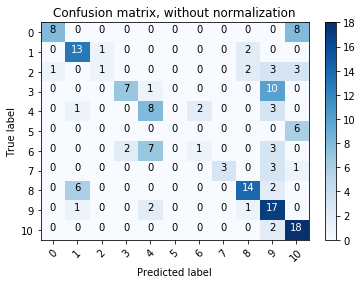

In [62]:
plt.show()

In [63]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes = ['0','1','2','3','4','5','6','7','8','9', '10'],
                      normalize=True,
                      title='Confusion matrix, with normalization')

Normalized confusion matrix
[[0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.5 ]
 [0.   0.81 0.06 0.   0.   0.   0.   0.   0.12 0.   0.  ]
 [0.1  0.   0.1  0.   0.   0.   0.   0.   0.2  0.3  0.3 ]
 [0.   0.   0.   0.39 0.06 0.   0.   0.   0.   0.56 0.  ]
 [0.   0.07 0.   0.   0.57 0.   0.14 0.   0.   0.21 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.15 0.54 0.   0.08 0.   0.   0.23 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.43 0.   0.43 0.14]
 [0.   0.27 0.   0.   0.   0.   0.   0.   0.64 0.09 0.  ]
 [0.   0.05 0.   0.   0.1  0.   0.   0.   0.05 0.81 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.1  0.9 ]]


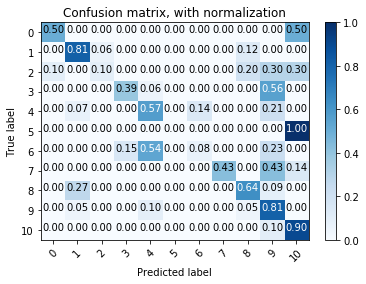

In [64]:
plt.show()

- HYPERPARAMETER OPTIMIZATION 


OK, but we didn't optimize the parameters of the SVM, such as:

1) Kernel

2) Cost 

3) Kernel parameters (gamma)

So, let's do it now using a Grid Search (5-fold) cross-validation on the training dataset

In [65]:
# Set the parameters by cross-validation
from sklearn.model_selection import GridSearchCV
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5], 'C': [1, 10, 100, 1000, 10000]},
#                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000, 10000]}]
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000, 10000]}]


metrics = ['precision', 'recall']

In [66]:
for metric in metrics:
    print("# Tuning hyper-parameters for %s" % metric)
    print()

    tuned_model = GridSearchCV(svm.SVC(probability=True), tuned_parameters, cv=5, scoring='%s_macro' % metric)
    tuned_model.fit(Xtrain, Ytrain2)

    print("Best parameters set found on development set:")
    print()
    print(tuned_model.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = tuned_model.cv_results_['mean_test_score']
    stds = tuned_model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, tuned_model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Yvalid2, tuned_model.predict(Xvalid)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/Users/akoerich/anaconda3/envs/gti770/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/akoerich/anaconda3/envs/gti770/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/akoerich/anaconda3/envs/gti770/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/akoerich/anaconda3/envs/gti770/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'prec

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

0.480 (+/-0.158) for {'C': 1, 'kernel': 'linear'}
0.689 (+/-0.139) for {'C': 10, 'kernel': 'linear'}
0.637 (+/-0.157) for {'C': 100, 'kernel': 'linear'}
0.632 (+/-0.129) for {'C': 1000, 'kernel': 'linear'}
0.632 (+/-0.129) for {'C': 10000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.58      0.69      0.63        16
           2       0.57      0.40      0.47        10
           3       1.00      0.28      0.43        18
           4       0.50      0.79      0.61        14
           5       0.60      0.50      0.55         6
           6       1.00      0.08      0.14        13
           7       0.25      0.14      0.18         7
     

/Users/akoerich/anaconda3/envs/gti770/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [67]:
# Fit the model (TRAIN)
# Retrain the tuned model with the training dataset.
# This is not really necessary as we did it in the cell above...
tuned_model.fit(Xtrain, Ytrain2)

/Users/akoerich/anaconda3/envs/gti770/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall_macro', verbose=0)

In [68]:
# Use the model to predict the class of samples
# Notice that we are testing the train dataset
Ytrain_pred = tuned_model.predict(Xtrain)
Ytrain_pred

Yvalid_pred = tuned_model.predict(Xvalid)
Yvalid_pred

array([ 0,  0,  0,  0,  0, 10, 10,  0, 10,  0,  0, 10, 10,  0,  0,  0,  9,
        8,  1,  1,  1,  1,  1,  8,  1,  1,  1,  9,  8,  1,  1,  1,  9,  0,
        2,  9, 10,  2,  2, 10,  2, 10,  3,  9,  3,  9,  3,  9,  9,  9,  4,
        3,  9,  3,  9,  9,  9,  9,  9,  9,  9,  4,  4,  4,  4,  4,  4,  4,
        4,  1,  4,  4,  4,  9,  5, 10,  5, 10,  5,  7,  4,  4,  2,  6,  4,
        4,  4,  2,  4,  4,  4,  9,  4,  9,  9,  7,  9,  9,  9,  9,  1,  1,
        8,  1,  1,  8,  1,  8,  9,  9,  9,  8,  8,  8,  2,  9,  8,  1,  8,
        8,  9,  1,  4,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,  7,  5,  5, 10,
       10, 10, 10, 10, 10, 10,  7,  9,  9, 10])

In [69]:
# You can also predict the probability of each class
# train dataset
Ytrain_pred_prob = tuned_model.predict_proba(Xtrain)
Ytrain_pred_prob

Yvalid_pred_prob = tuned_model.predict_proba(Xvalid)
Yvalid_pred_prob

array([[0.48, 0.05, 0.04, ..., 0.13, 0.03, 0.16],
       [0.72, 0.02, 0.01, ..., 0.03, 0.  , 0.19],
       [0.61, 0.03, 0.01, ..., 0.01, 0.01, 0.26],
       ...,
       [0.03, 0.01, 0.13, ..., 0.01, 0.27, 0.31],
       [0.02, 0.01, 0.06, ..., 0.01, 0.55, 0.08],
       [0.03, 0.01, 0.06, ..., 0.01, 0.26, 0.48]])

In [70]:
# Final evaluation of the model (On the Training, Validation or Test dataset)
scores_tuned = accuracy_score(Ytrain2, Ytrain_pred )
print("Correct classification rate for the training dataset (first model) = "+str(scores*100)+"%")
print("Correct classification rate for the training dataset (best model) = "+str(scores_tuned*100)+"%")
print()
scores_tuned = accuracy_score(Yvalid2, Yvalid_pred )
print("Correct classification rate for the validation dataset (first model) = "+str(scores2*100)+"%")
print("Correct classification rate for the validation dataset (best model) = "+str(scores_tuned*100)+"%")

Correct classification rate for the training dataset (first model) = 65.57377049180327%
Correct classification rate for the training dataset (best model) = 90.1639344262295%

Correct classification rate for the validation dataset (first model) = 55.21472392638037%
Correct classification rate for the validation dataset (best model) = 55.21472392638037%


In [72]:
# Predict and show the confusion matrix (For the Validation dataset)
cm = confusion_matrix(Yvalid2, Yvalid_pred )
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes = ['0','1','2','3','4','5','6','7','8','9','10'],
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[11  0  0  0  0  0  0  0  0  0  5]
 [ 0 11  0  0  0  0  0  0  3  2  0]
 [ 1  0  4  0  0  0  0  0  0  2  3]
 [ 0  0  0  5  1  0  0  0  0 12  0]
 [ 0  1  0  0 11  0  0  0  0  2  0]
 [ 0  0  0  0  0  3  0  1  0  0  2]
 [ 0  0  2  0  9  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  0  6  0]
 [ 0  7  1  0  0  0  0  0  9  5  0]
 [ 0  0  0  0  1  0  0  0  0 20  0]
 [ 0  0  0  0  0  2  0  2  0  2 14]]


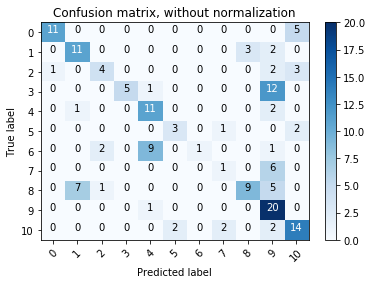

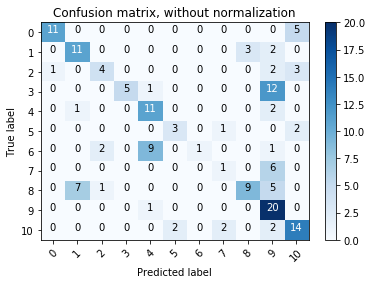

In [73]:
plt.show()

In [74]:
print("Notebook ended")

Notebook ended
